# SIE 533 Final Project
####Authors : Sarthak Miglani, Shakir Ahmed, Udit Chaudhary
####Data Set : Big Tech Stocks


## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima.model import ARIMA

## Data Selection

This dataset consists of the daily stock prices and volume of 14 different tech companies, including Apple (AAPL), Amazon (AMZN), Alphabet (GOOGL), and Meta Platforms (META) and more!

\\
Data Dictionary

|variable     |class     |description  |
|:------------|:---------|:------------|
|stock_symbol |character |stock_symbol |
|date         |double    |date         |
|open         |double    |The price at market open.|
|high         |double    |The highest price for that day.|
|low          |double    |The lowest price for that day.|
|close        |double    |The price at market close, adjusted for splits.|
|adj_close    |double    |The closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.|
|volume       |double    |The number of shares traded on that day.|

## Data Importing

In [2]:
stock = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv', header='infer')

#Displaying the data details
stock

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...,...
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


## Time series visualization of the data


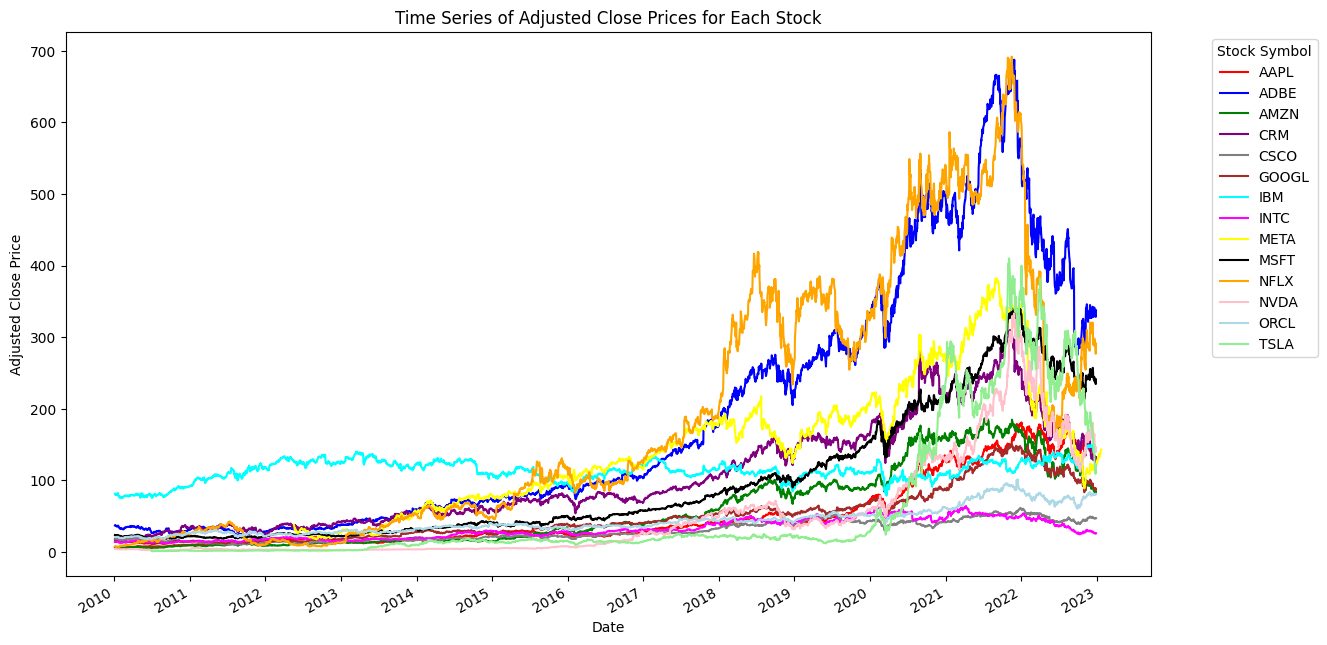

In [3]:
unique_symbols = stock['stock_symbol'].unique()
colors = ['red', 'blue', 'green', 'purple', 'grey', 'brown', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'pink', '#ADD8E6', '#90EE90']
color_palette = {symbol: colors[i % len(colors)] for i, symbol in enumerate(unique_symbols)}

plt.figure(figsize=(14, 8))

stock['date'] = pd.to_datetime(stock['date'])

for symbol in unique_symbols:
    subset = stock[stock['stock_symbol'] == symbol]
    plt.plot(subset['date'], subset['adj_close'], label=symbol, color=color_palette[symbol])

# Setting the x-axis major locator to yearly and the formatter to only show the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotating the dates for better visibility
plt.gcf().autofmt_xdate()

plt.title('Time Series of Adjusted Close Prices for Each Stock')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(title='Stock Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

A line graph that shows the time series of adjusted closing prices for the stocks from 2010 to 2023. Each stock is represented by a different colored line, with the stock symbols listed in a legend on the right. The vertical axis shows the adjusted closing price in dollars, while the horizontal axis represents the time from 2010 to 2023. The lines show fluctuations in stock prices over time, with some stocks showing significant growth

## Exploratory Data Analysis:

### Missing Values


There are no missing values in the dataset. Each of the eight columns ('stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close', 'volume') has a non-null count equal to the total number of entries, which is 45,088. Consequently, the percentage of missing values for each column is 0.0%, confirming that the dataset is complete with no missing data.

In [4]:
# Display basic information about the dataset
print(stock.info())

# Describe missing values
missing_values = stock.isnull().sum()
print("Missing Values:")
print(missing_values)

# Percentage of missing values in each column
missing_percentage = (missing_values / len(stock)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB
None
Missing Values:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

Percentage of Missing Values:
stock_symbol    0.0
date            0.0
open            0.0
high            0.0
low             0.0
cl

### Pair-Plot


The pair plot is a grid of graphs showing how each stock variable, like opening and closing prices, relates to the others. On the diagonal are histograms showing how often different values occur for each variable. The scatter plots off the diagonal show trends or patterns between two variables, like how the high and low prices compare throughout the data.

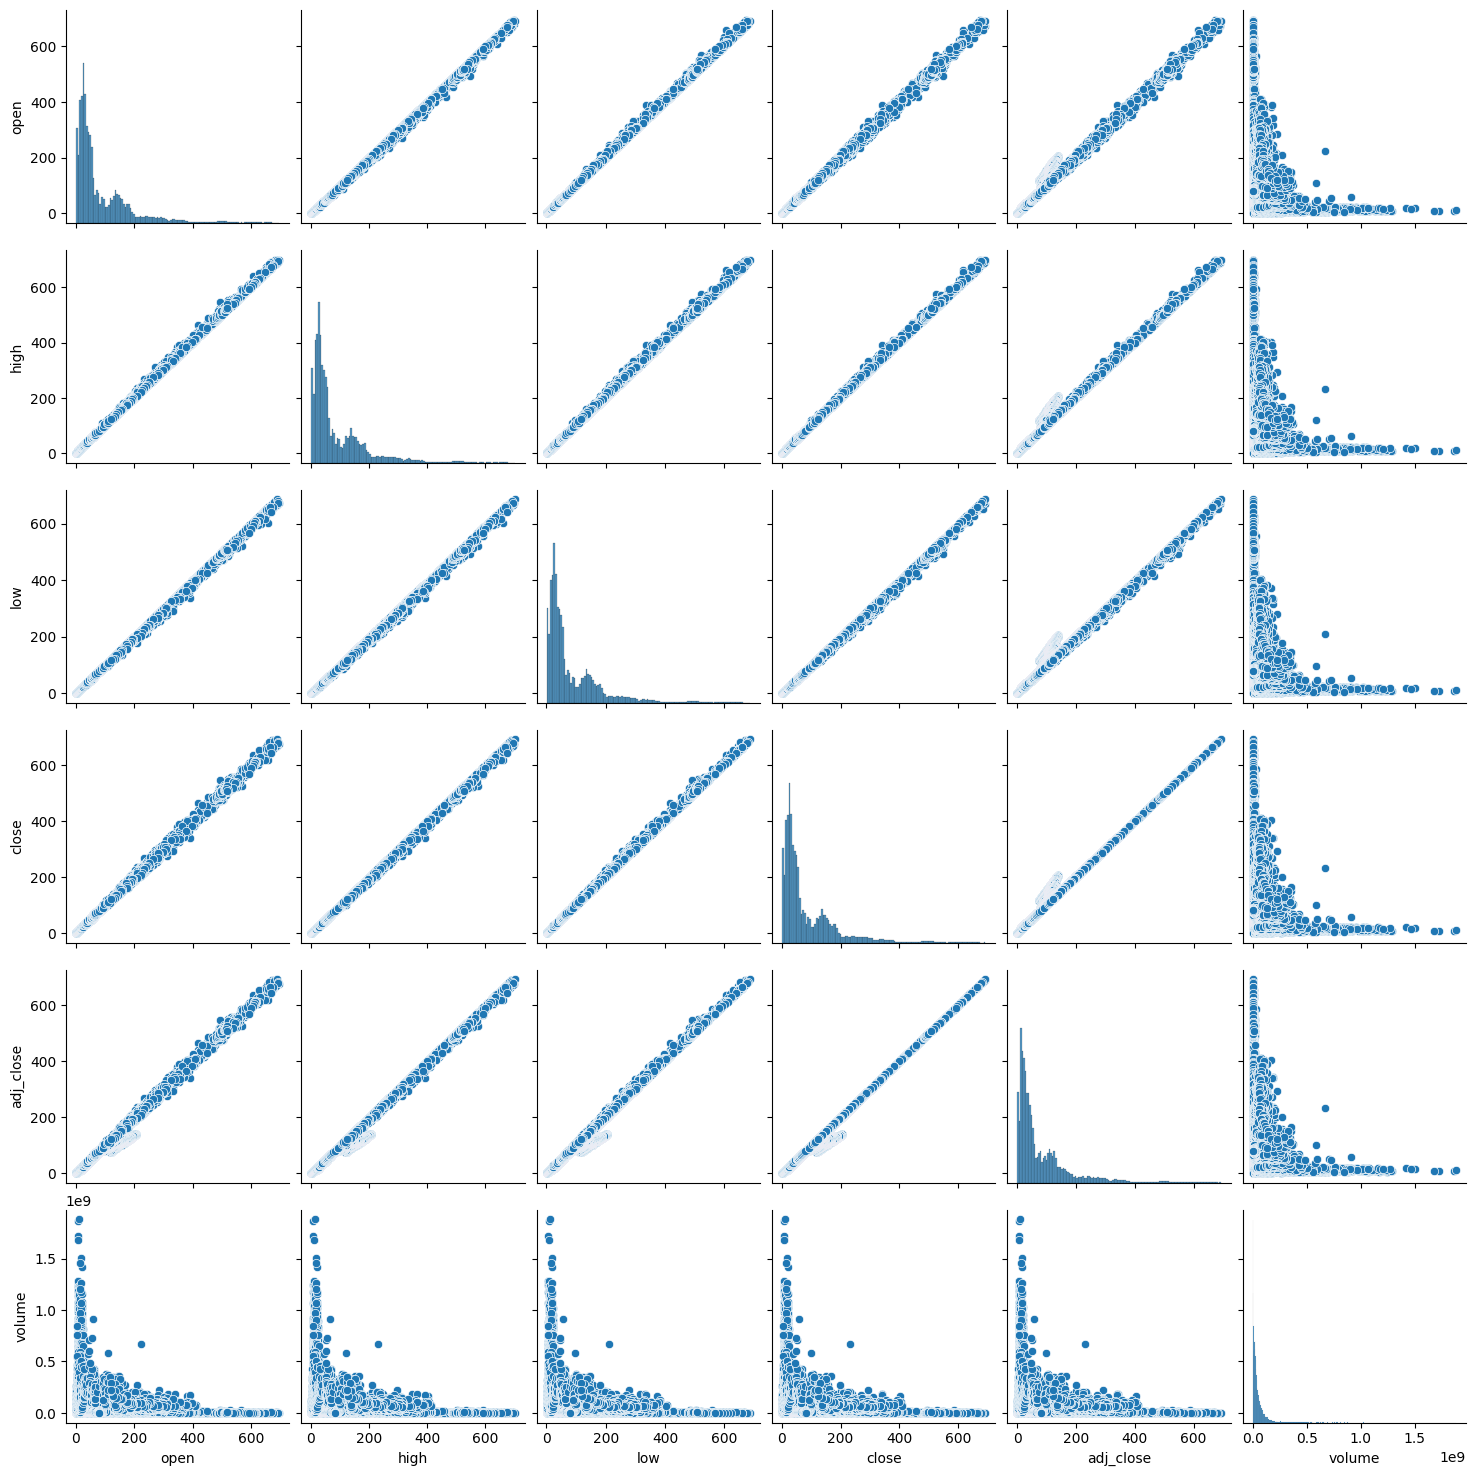

In [5]:
numerical_data = stock[['open', 'high', 'low', 'close', 'adj_close', 'volume']]

# Create the pair plot
sns.pairplot(numerical_data)

# Display the plot
plt.show()

### Correlation Heatmap


The heatmap shows how closely related different stock market variables are to each other, like opening and closing prices. Dark green squares show a very strong relationship, which is the case for open, high, low, close, and adjusted close values—they're all very similar. The volume is less related to these prices, as indicated by the brown squares.

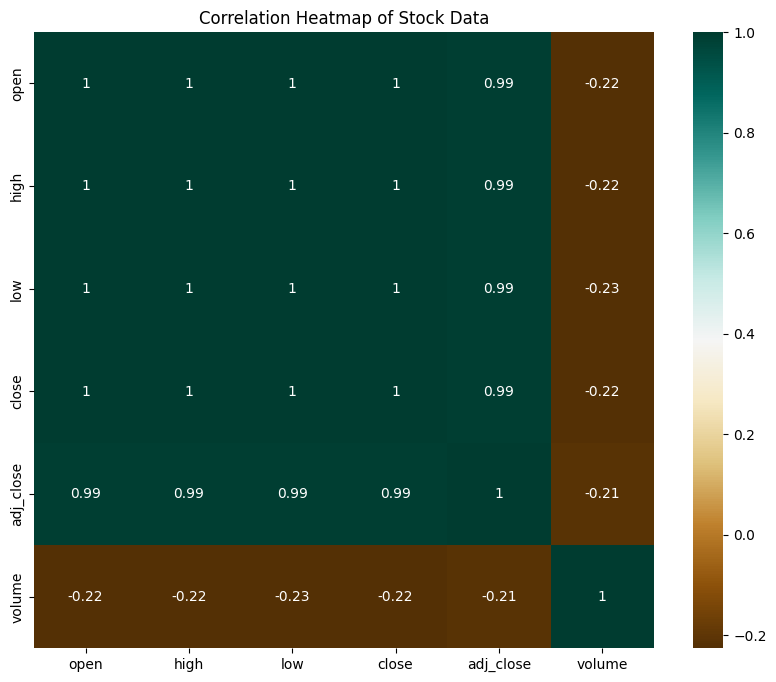

In [6]:
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap using the BrBG color palette
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')

# Improve the visibility of the heatmap
plt.title('Correlation Heatmap of Stock Data')

# Display the heatmap
plt.show()

### Outliers

The outliers in the dataset can be spotted in boxplot graphs for each numerical stock column like open, high, low, close, and adjusted close prices, along with volume. These boxplots highlight points that are far away from the main group of data, often seen as dots past the 'whiskers' of the boxplots. The descriptive statistics show values that are much higher or lower than the mean, suggesting these are outliers.


Descriptive Statistics:
                                date          open          high  \
count                          45088  45088.000000  45088.000000   
mean   2016-08-03 15:35:09.794180352     89.266584     90.369825   
min              2010-01-04 00:00:00      1.076000      1.108667   
25%              2013-05-30 00:00:00     25.670000     25.930135   
50%              2016-08-09 00:00:00     47.930000     48.459999   
75%              2019-10-21 06:00:00    128.662502    129.848900   
max              2023-01-24 00:00:00    696.280029    700.989990   
std                              NaN    101.626955    103.001073   

                low         close     adj_close        volume  
count  45088.000000  45088.000000  45088.000000  4.508800e+04  
mean      88.111930     89.271306     85.209631  5.297813e+07  
min        0.998667      1.053333      1.053333  5.892000e+05  
25%       25.360001     25.660000     22.076433  9.629425e+06  
50%       47.465000     47.970001     45.3

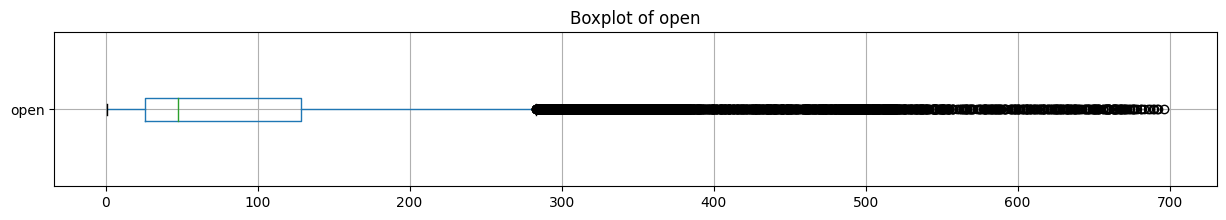

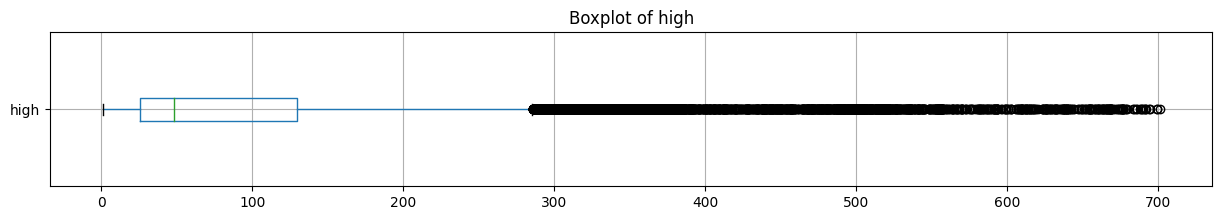

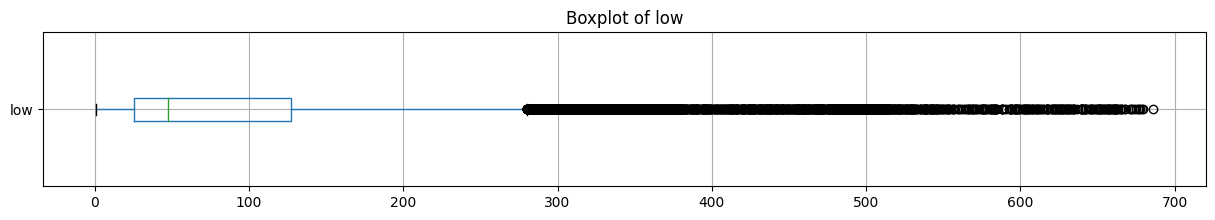

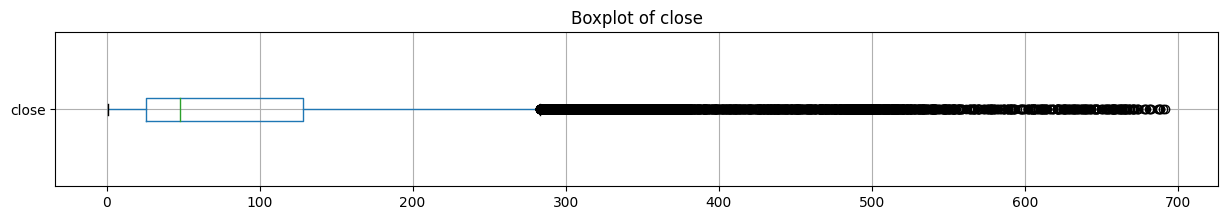

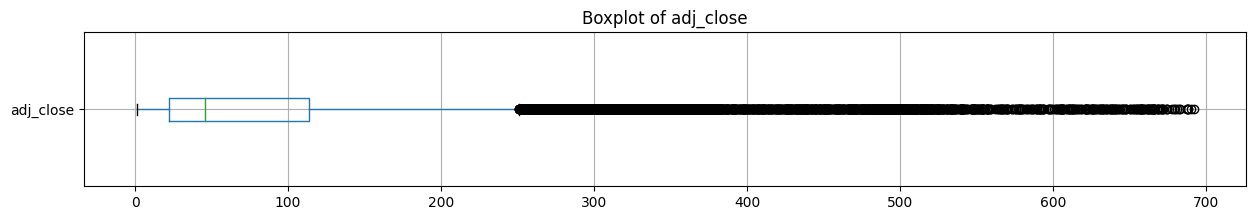

In [7]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(stock.describe())

numerical_columns = stock.select_dtypes(include=['float64']).columns

# Visualize outliers using horizontal box plots
for column in numerical_columns:
    plt.figure(figsize=(15, 2))
    stock.boxplot(column=column, vert=False)
    plt.title(f'Boxplot of {column}')
    plt.show()

## Data Preprocessing

### Data cleaning

Since there are no missing values, we will not be performing any imputation techniques like mean or median imputing or model-based methods, or drop rows/columns with missing values.

### Removing outliers

Before Outlier Removal:
                                date          open          high  \
count                          45088  45088.000000  45088.000000   
mean   2016-08-03 15:35:09.794180352     89.266584     90.369825   
min              2010-01-04 00:00:00      1.076000      1.108667   
25%              2013-05-30 00:00:00     25.670000     25.930135   
50%              2016-08-09 00:00:00     47.930000     48.459999   
75%              2019-10-21 06:00:00    128.662502    129.848900   
max              2023-01-24 00:00:00    696.280029    700.989990   
std                              NaN    101.626955    103.001073   

                low         close     adj_close        volume  
count  45088.000000  45088.000000  45088.000000  4.508800e+04  
mean      88.111930     89.271306     85.209631  5.297813e+07  
min        0.998667      1.053333      1.053333  5.892000e+05  
25%       25.360001     25.660000     22.076433  9.629425e+06  
50%       47.465000     47.970001     45.37

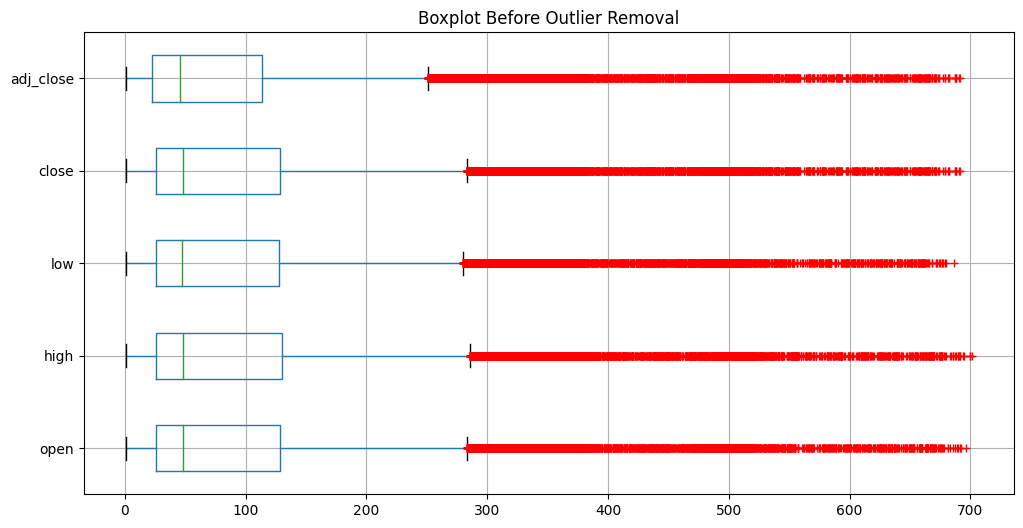

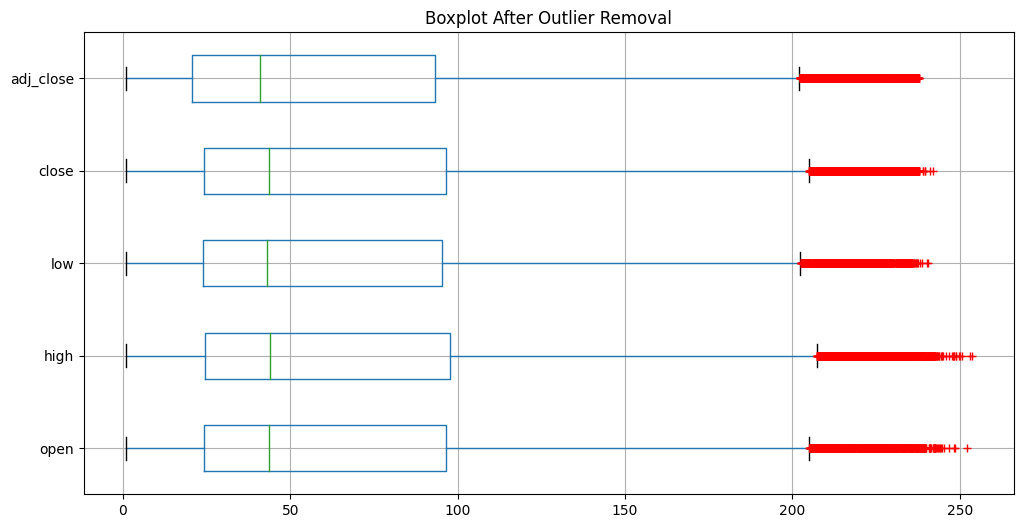

In [8]:
# Display basic statistics before outlier removal
print("Before Outlier Removal:")
print(stock.describe())

# Define the columns to check for outliers
columns_to_check = ['open', 'high', 'low', 'close', 'adj_close']

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Function to remove outliers based on z-scores
def remove_outliers(data, columns, threshold):
    for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data = data[(z_scores <= threshold)]
    return data

# Remove outliers
stock_cleaned = remove_outliers(stock, columns_to_check, z_score_threshold)

# Display basic statistics after outlier removal
print("\nAfter Outlier Removal:")
print(stock_cleaned.describe())

# Columns to plot
columns_to_plot = ['open', 'high', 'low', 'close', 'adj_close']

# Create boxplots before outlier removal
plt.figure(figsize=(12, 6))
stock[columns_to_plot].boxplot(sym='r+', vert=False)
plt.title('Boxplot Before Outlier Removal')
plt.show()

# Create boxplots after outlier removal
plt.figure(figsize=(12, 6))
stock_cleaned[columns_to_plot].boxplot(sym='r+', vert=False)
plt.title('Boxplot After Outlier Removal')
plt.show()

## Predictive Analysis

For our predictive analysis, we have developed a comprehensive approach that utilizes four distinct machine learning models, each chosen for its unique strengths and capabilities in forecasting outcomes. These models include:

* **Linear Regression**: A foundational model that assesses the linear relationship between the independent variables and the dependent variable.
* **Lasso Regression**: An extension of linear regression that incorporates L1 regularization, which can help in feature selection and reducing overfitting.
* **Random Forest Regression**: An ensemble learning method that uses multiple decision trees to produce a more accurate and robust prediction by averaging the results.
* **Multi-Layer Perceptron (MLP)**: A class of feedforward Artificial Neural Network that can model complex non-linear relationships between inputs and outputs.

By leveraging the diverse approaches of these models, we aim to enhance the accuracy and reliability of our predictive analysis.

### **Linear Regression**


In the Linear Regression code, we use a model to predict stock prices ('adj_close') based on other market factors ('open', 'high', 'low', 'close'). The model is trained with part of the data and then tested to see how well it predicts new data, showing it's generally accurate with a Mean Squared Error of 92.29 and an R-squared of about 96.8%. Finally, we look at the differences between predicted and actual prices with plots, noticing where the model did not predict perfectly.

In [9]:
# Define the features (X) and target variable (y)
X = stock_cleaned[['open', 'high', 'low', 'close']]
y = stock_cleaned['adj_close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 92.29796060861337
R-squared: 0.9682731696269559


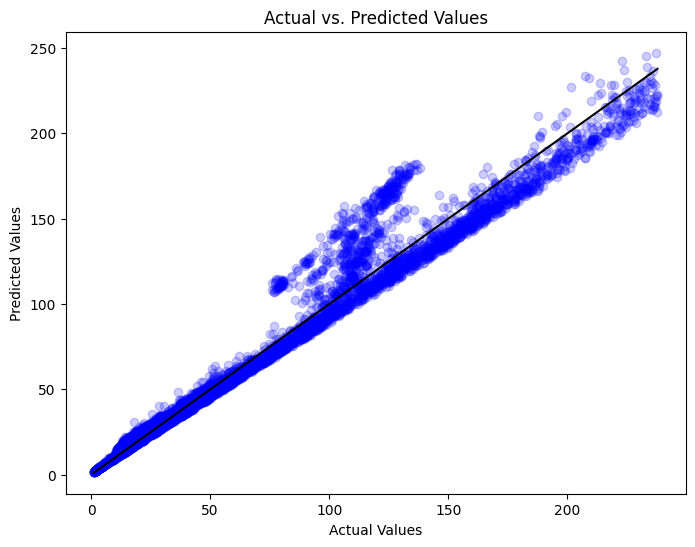

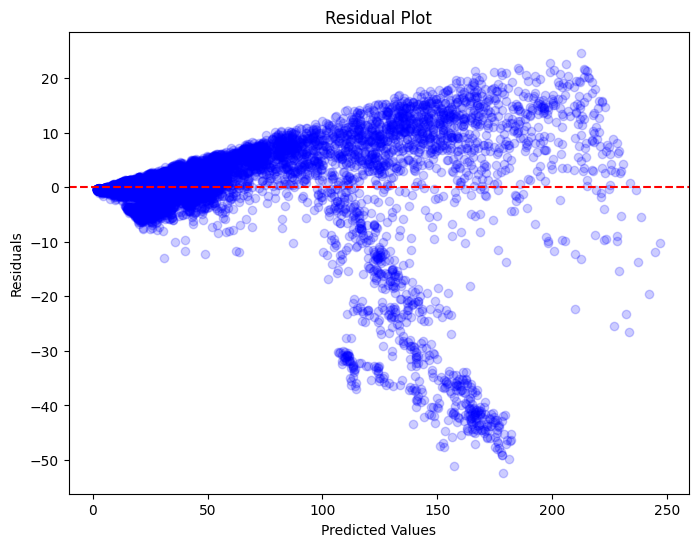

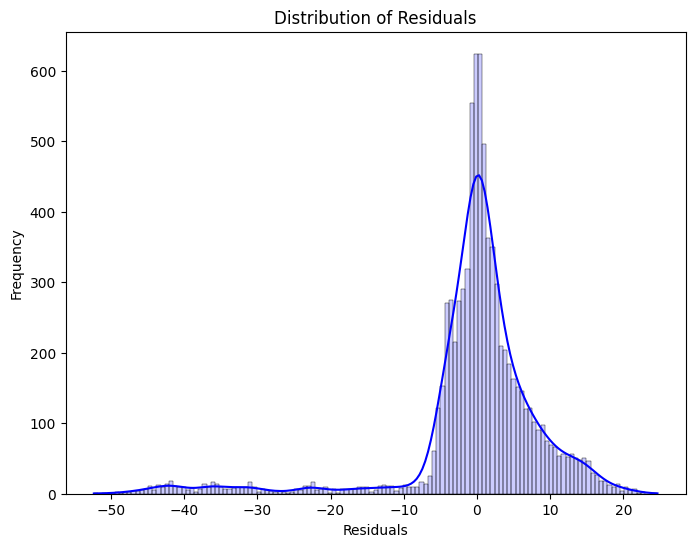

In [11]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.2)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', alpha=0.2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

The first plot shows how the predicted stock prices compare to the actual prices, with most points lying along a line, indicating good prediction accuracy. The second plot displays the residuals, which are the differences between actual and predicted values; points are scattered around the zero line, showing some errors in prediction. The third plot is a histogram that tells us how often different residuals occurred, with most near zero, suggesting many predictions were close to the actual values.

## **Lasso Regression**

In the Lasso Regression code, we create a model that not only predicts stock prices but also simplifies the model by reducing the number of variables if some do not help much in the prediction (this is done by the 'alpha' value, which controls the strength of this simplification). The model's accuracy is slightly lower than the basic Linear Regression, with an R-squared of about 96.82%. We then check the predictions against the actual prices and the errors (residuals) using scatter and histogram plots.

In [12]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1, max_iter=20000)  # Set the regularization strength

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (Lasso):", mse_lasso)
print("R-squared (Lasso):", r2_lasso)

Mean Squared Error (Lasso): 92.33161209522237
R-squared (Lasso): 0.9682616021448532


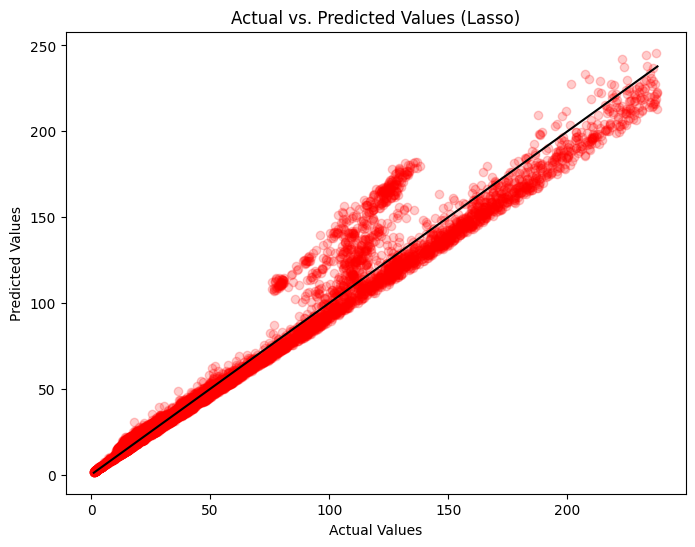

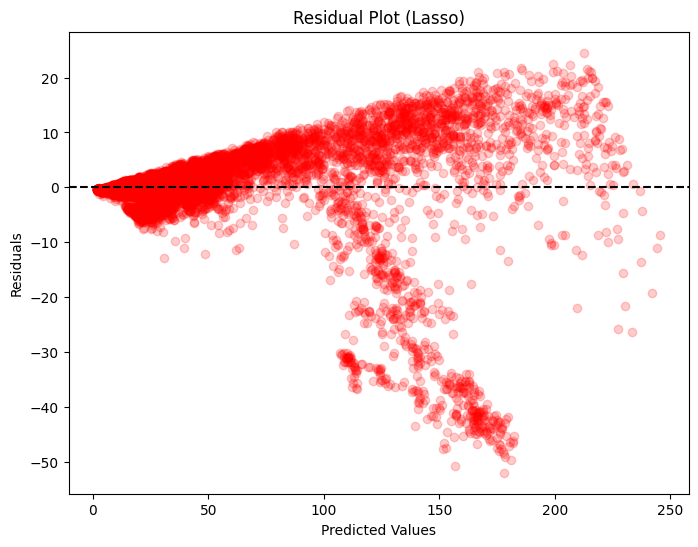

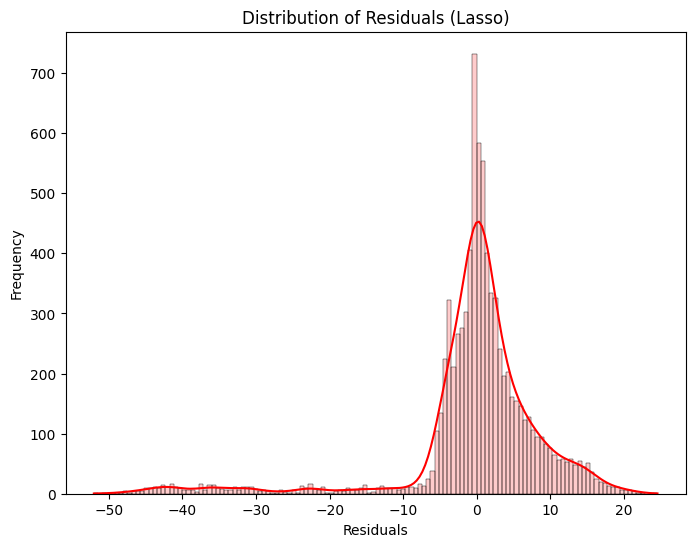

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Lasso)')
plt.show()

residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lasso, residuals_lasso, color='red', alpha=0.2)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso)')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals_lasso, kde=True, color='red', alpha=0.2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Lasso)')
plt.show()


The first plot compares actual stock values to those predicted by the Lasso model, showing a tight clustering along the line, indicating good prediction but with some spread. The second plot of residuals shows the differences between the predicted and actual values, with a concentration of points around the zero line but with some large deviations for higher values. The third plot shows the distribution of these differences, mostly centered around zero, which indicates the predictions were often close to the actual values, although there are some notable exceptions to the sides.

## **Random Forest Regression**

In the Random Forest model code, we use an ensemble of decision trees to predict stock prices, which often results in more accurate and stable predictions compared to a single decision tree. The model shows a Mean Squared Error of 75.59 and an R-squared of 97.4%, indicating it predicts quite closely to the actual values. We use plots to visually compare the predicted values against the actual ones and to analyze the prediction errors (residuals).

In [14]:
# Create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse_rf)
print("R-squared (Random Forest):", r2_rf)

Mean Squared Error (Random Forest): 75.59207922132566
R-squared (Random Forest): 0.9740157089150581


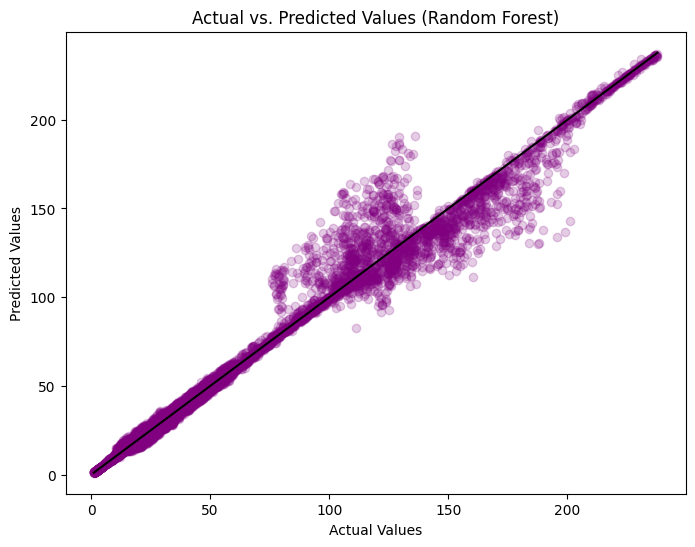

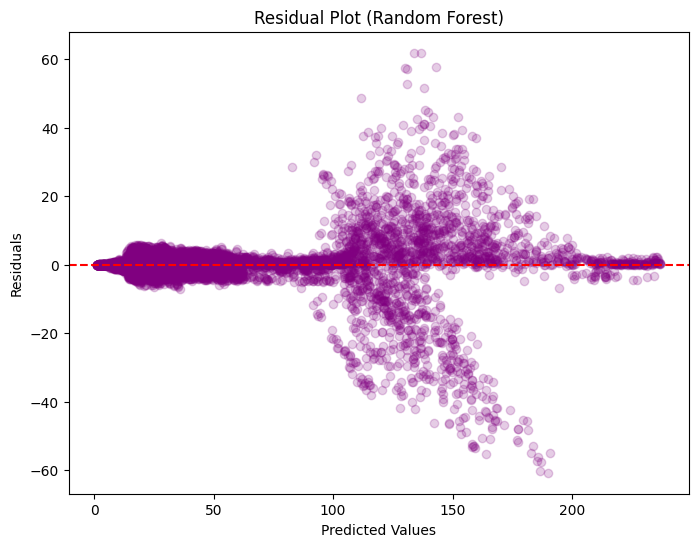

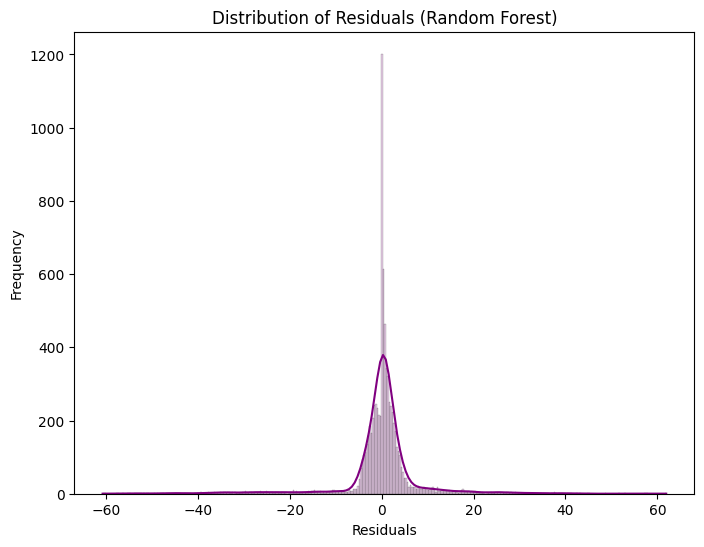

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.show()

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, color='purple', alpha=0.2)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='purple', alpha=0.2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest)')
plt.show()

The first plot shows actual versus predicted stock prices by the Random Forest model, and most points are close to the black line, indicating accurate predictions. The second plot shows residuals, the differences between predicted and actual values, scattered around a horizontal line, with a cluster of large errors for higher values. The third plot, a histogram of residuals, shows most predictions were quite accurate, with a peak around zero, but also some larger errors farther from zero.

## **Multi-Layer Perceptron (MLP)**


In the Multi-Layer Perceptron model code, we use a type of neural network with two layers of processing to predict stock prices, with the network 'learning' complex patterns through its layers. The model has a Mean Squared Error of about 97 and an R-squared score of approximately 96.7%, which means it's quite good at making predictions that match the actual data. We use several plots to check how the predicted values compare to the actual ones and to look at the prediction errors, which are the residuals.

In [16]:
# Create a MLP regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Mean Squared Error (Neural Network):", mse_mlp)
print("R-squared (Neural Network):", r2_mlp)

Mean Squared Error (Neural Network): 96.99185758421129
R-squared (Neural Network): 0.96665967272896


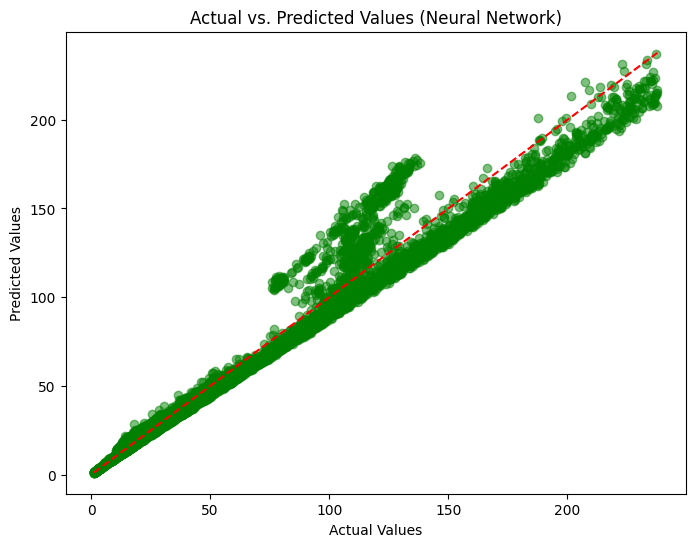

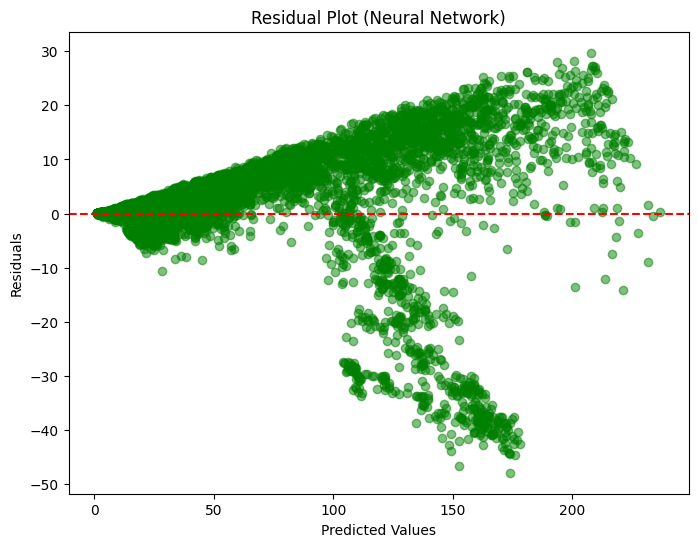

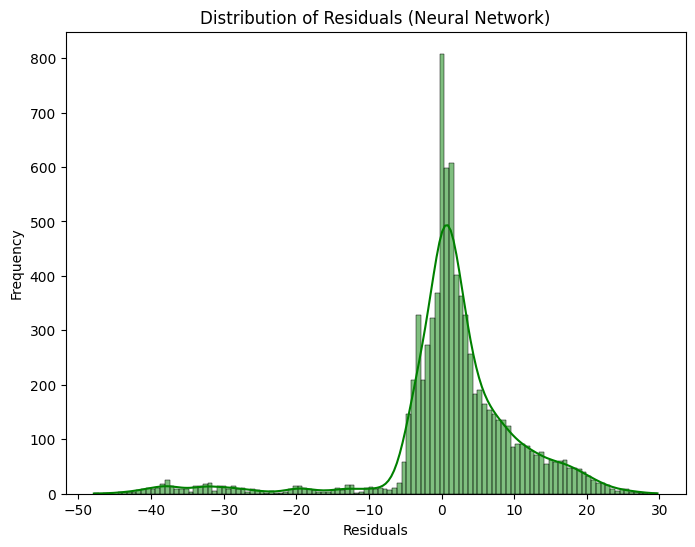

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.show()

residuals_mlp = y_test - y_pred_mlp
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_mlp, residuals_mlp, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Neural Network)')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals_mlp, kde=True, color='green', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Neural Network)')
plt.show()

The first plot shows a comparison of the actual and predicted stock values by the neural network model, mostly following the line, which means the predictions are good. The second plot is a residual plot that shows some errors in prediction, especially for higher values, as they deviate from the zero line. The third plot is a histogram that peaks sharply around zero, indicating that most predictions were close to the actual values, but there are also some errors further away from zero.

## Time Series Forecasting using ARIMA Model

The code prepares stock market data and uses an ARIMA model to forecast future adjusted closing prices for each stock. First, it separates the historical data up to the start of 2023 to train the model. Then, it groups the data by date and stock symbol, selecting the maximum adjusted closing price for each month. For each stock, it fits an ARIMA model on the historical data and uses it to predict the closing prices for the next 12 months of 2023, displaying these forecasts with a plot alongside the historical data.

In [18]:
stock['date'] = pd.to_datetime(stock['date'])

# Split data into training and testing sets based on a cutoff date
cutoff_date = pd.to_datetime('2023-01-01')
train = stock[stock['date'] < cutoff_date]
test = stock[stock['date'] >= cutoff_date]

<ipython-input-19-3093d15c58ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['date'] = pd.to_datetime(dataf['date'])
<ipython-input-19-3093d15c58ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf['date'] = dataf['date'].apply(lambda d: d.replace(day=1))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

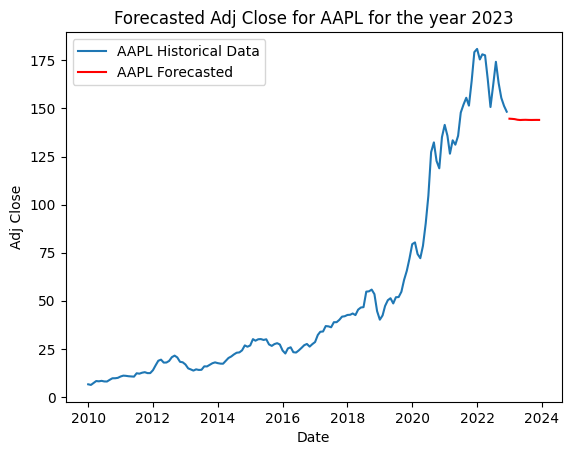

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


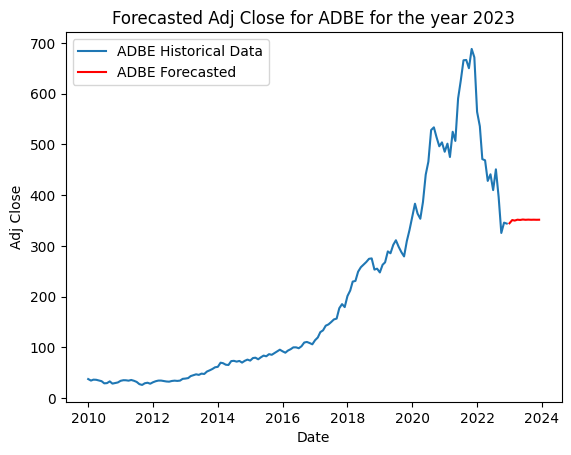

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


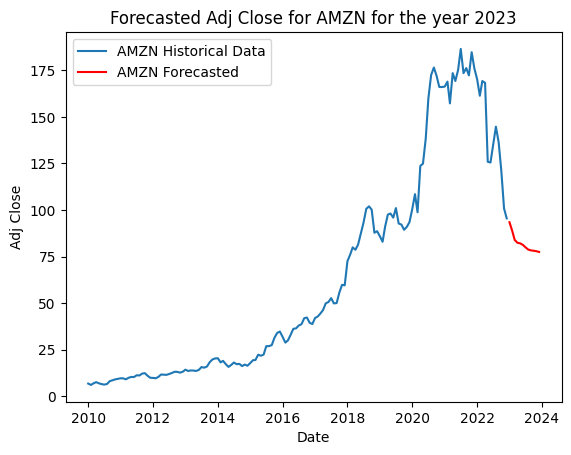

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


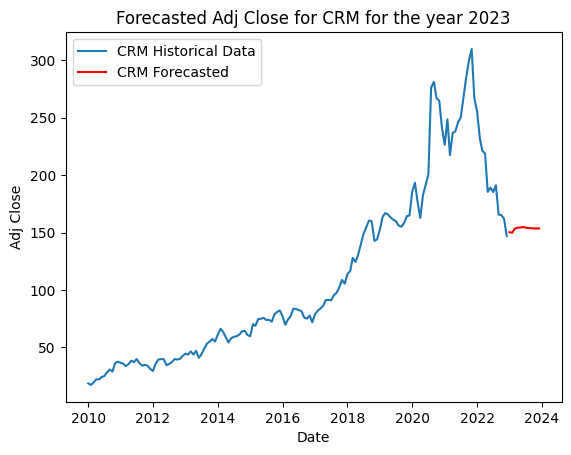

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


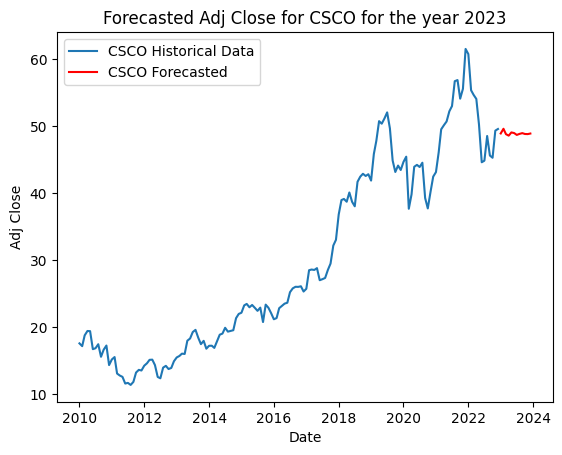

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


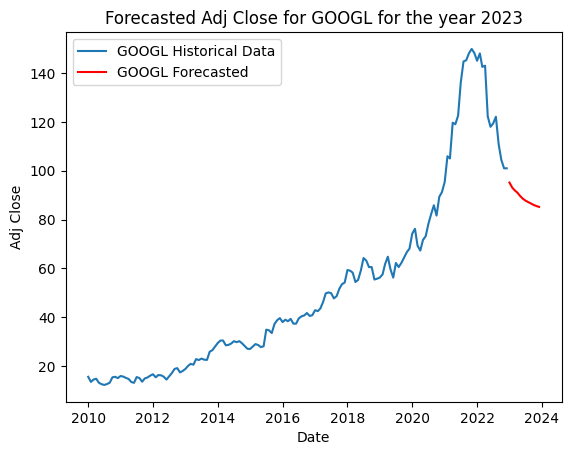

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


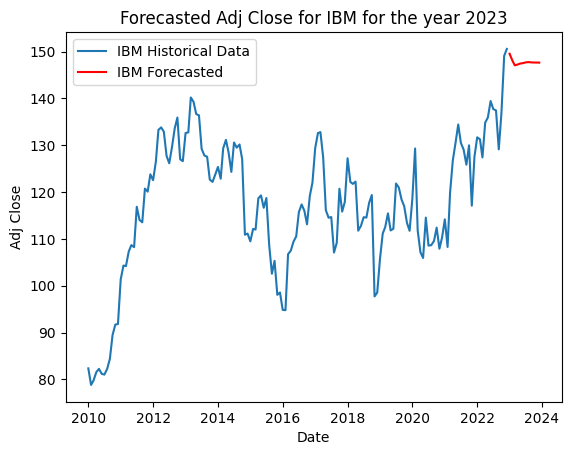

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


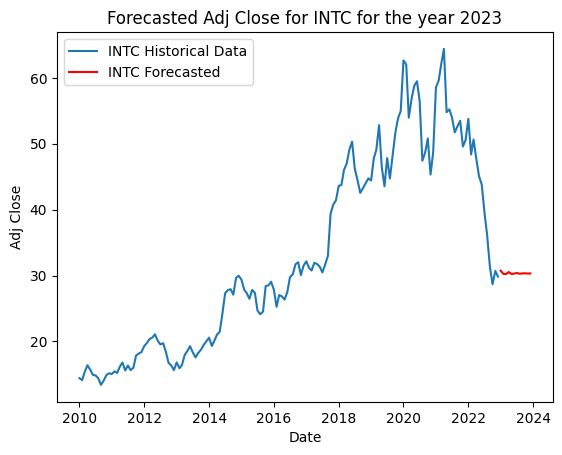

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


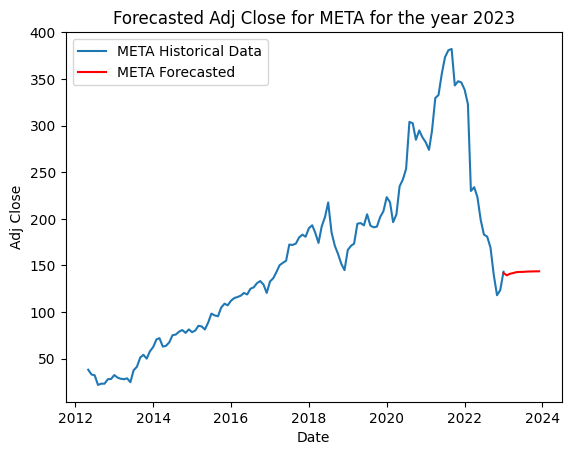

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


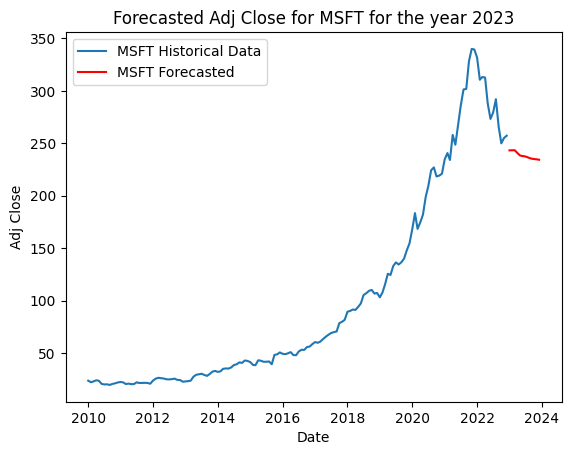

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


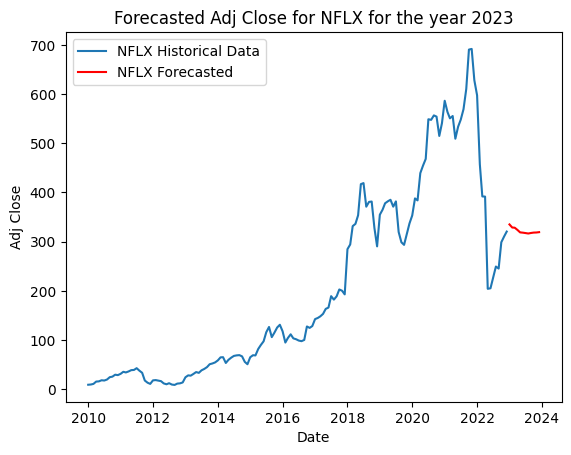

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


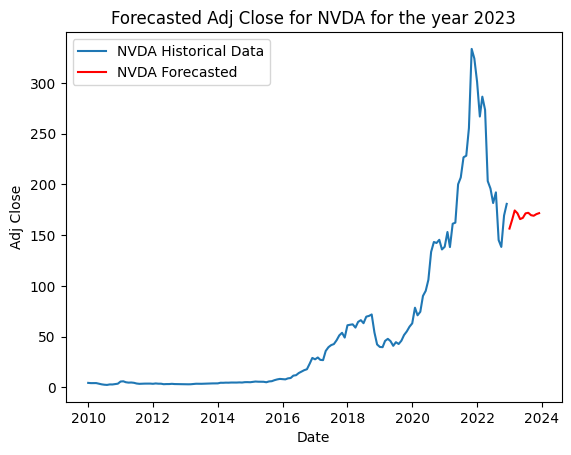

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


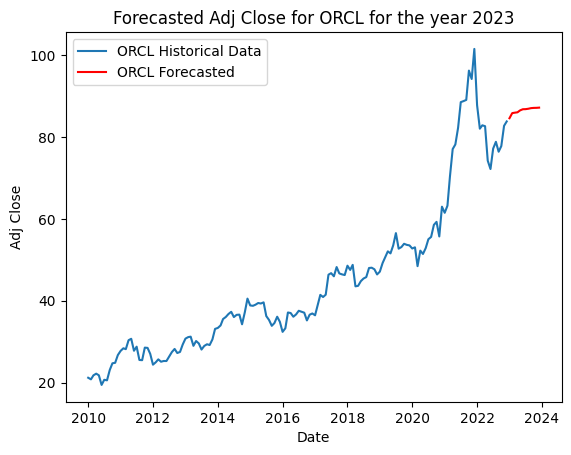

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


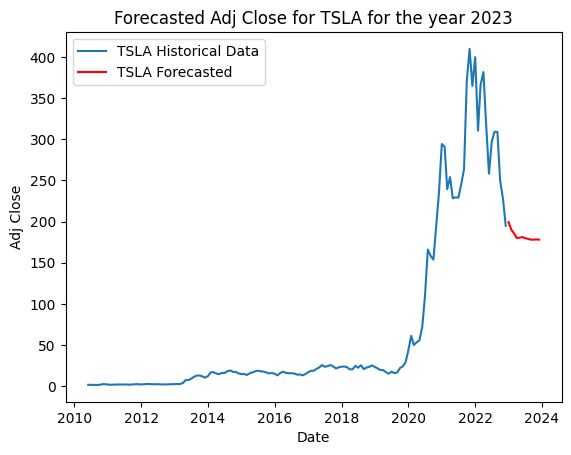

In [19]:
# Selecting necessary columns
dataf = stock[['date' , 'adj_close', 'stock_symbol']]

# Ensure 'date' is a datetime column
dataf['date'] = pd.to_datetime(dataf['date'])

# Normalize dates to the first day of each month
dataf['date'] = dataf['date'].apply(lambda d: d.replace(day=1))

# Group by 'date', 'stock_symbol' and find the index of the max 'adj_close' within each group
idx = dataf.groupby(['date', 'stock_symbol'])['adj_close'].transform(max) == dataf['adj_close']

# Drop duplicates keeping the first occurrence (the one with the max 'adj_close' after the previous operation)
dataf_max = dataf[idx].drop_duplicates(['date', 'stock_symbol'])

# Ensure 'date' is a datetime column
dataf_max['date'] = pd.to_datetime(dataf_max['date'])

# Pivot the DataFrame to have stock symbols as columns
dataf_max_pivot = dataf_max.pivot(index='date', columns='stock_symbol', values='adj_close')

# Fit ARIMA model and forecast for each stock symbol
for symbol in dataf_max_pivot.columns:
    # Fit ARIMA model
    model = ARIMA(dataf_max_pivot[symbol], order=(5,1,0))
    model_fit = model.fit()

    # Forecasting for the year 2023
    forecast_steps = 12
    predictions = model_fit.forecast(steps=forecast_steps)

    # Creating date index for the year 2023
    date_index_2023 = pd.date_range(start='2023-01-01', periods=forecast_steps, freq='MS')

    # Plotting forecasts
    plt.plot(dataf_max_pivot.index, dataf_max_pivot[symbol], label=f'{symbol} Historical Data')
    plt.plot(date_index_2023, predictions, color='red', label=f'{symbol} Forecasted')
    plt.title(f'Forecasted Adj Close for {symbol} for the year 2023')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()
    plt.show()